In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis=1)

In [5]:
y = df.sales

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [11]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
polynomial_converter.transform(X).shape

(200, 9)

In [14]:
poly_features = polynomial_converter.transform(X)

In [13]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [17]:
poly_features.shape

(200, 9)

In [18]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [23]:
230.1**2 # TV power

52946.009999999995

In [20]:
230.1*37.8 # TV and Radio

8697.779999999999

In [21]:
230.1*69.2 # TV and Newspaper

15922.92

In [24]:
37.8**2 # radio power

1428.8399999999997

In [22]:
37.8*69.2 # radio and newspaper

2615.7599999999998

In [25]:
69.2**2 # newspaper power

4788.64

In [26]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
test_predictions = model.predict(X_test)

In [33]:
# model.coef_

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
MAE = mean_absolute_error(y_test, test_predictions)

In [37]:
MSE = mean_squared_error(y_test, test_predictions)

In [38]:
RMSE = np.sqrt(MSE)

In [39]:
MAE

0.48967980448035886

In [40]:
MSE

0.44175055104033895

In [41]:
RMSE

0.6646431757269

In [ ]:
# MAE: 1.231 RMSE: 1.516 Previous Linear Regression Result same data

In [42]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [43]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [44]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [45]:
69.2**2

4788.64

In [46]:
# create the different order poly
# split poly feat train/test
# fit on train
# store/save the rmse for BOTH the train AND test
# PLOT the results (error vs poly order)

In [52]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


In [53]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292234,
 0.4339344356902067,
 0.3517083688399345,
 0.2509342920355839,
 0.1939804799112384,
 5.421548315439824,
 0.1430133400721173,
 0.17192150430222924]

In [54]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269,
 0.5803286825225046,
 0.5077742636722449,
 2.575818164530007,
 4.318776680803161,
 1379.5295213343347,
 3910.2094980162265,
 94237.34126893997]

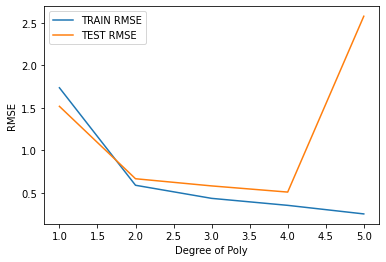

In [61]:
plt.plot(range(1,6), train_rmse_errors[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='TEST RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend();

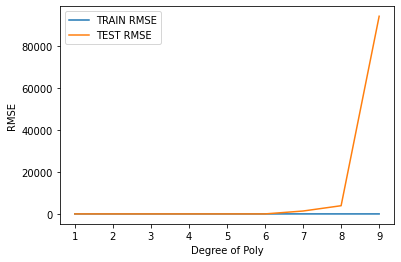

In [62]:
plt.plot(range(1,10), train_rmse_errors, label='TRAIN RMSE')
plt.plot(range(1,10), test_rmse_errors, label='TEST RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend();